In [1]:
import os
import tensorflow as tf

# Set CUDA device order and visible devices
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7,8,9"

# Set the device
device = '/cpu:0'
if tf.config.experimental.list_physical_devices('GPU'):
    try:
        # Restrict TensorFlow to only use the second GPU
        gpus = tf.config.experimental.list_physical_devices('GPU')
        if gpus:
            tf.config.experimental.set_visible_devices(gpus[9], 'GPU')
            device = '/gpu:9'
    except RuntimeError as e:
        print(e)

print("device", device)


2024-09-16 20:08:28.653073: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-16 20:08:28.667289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-16 20:08:28.680409: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-16 20:08:28.684400: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-16 20:08:28.696360: I tensorflow/core/platform/cpu_feature_guar

device /gpu:9


(98000, 19, 19)


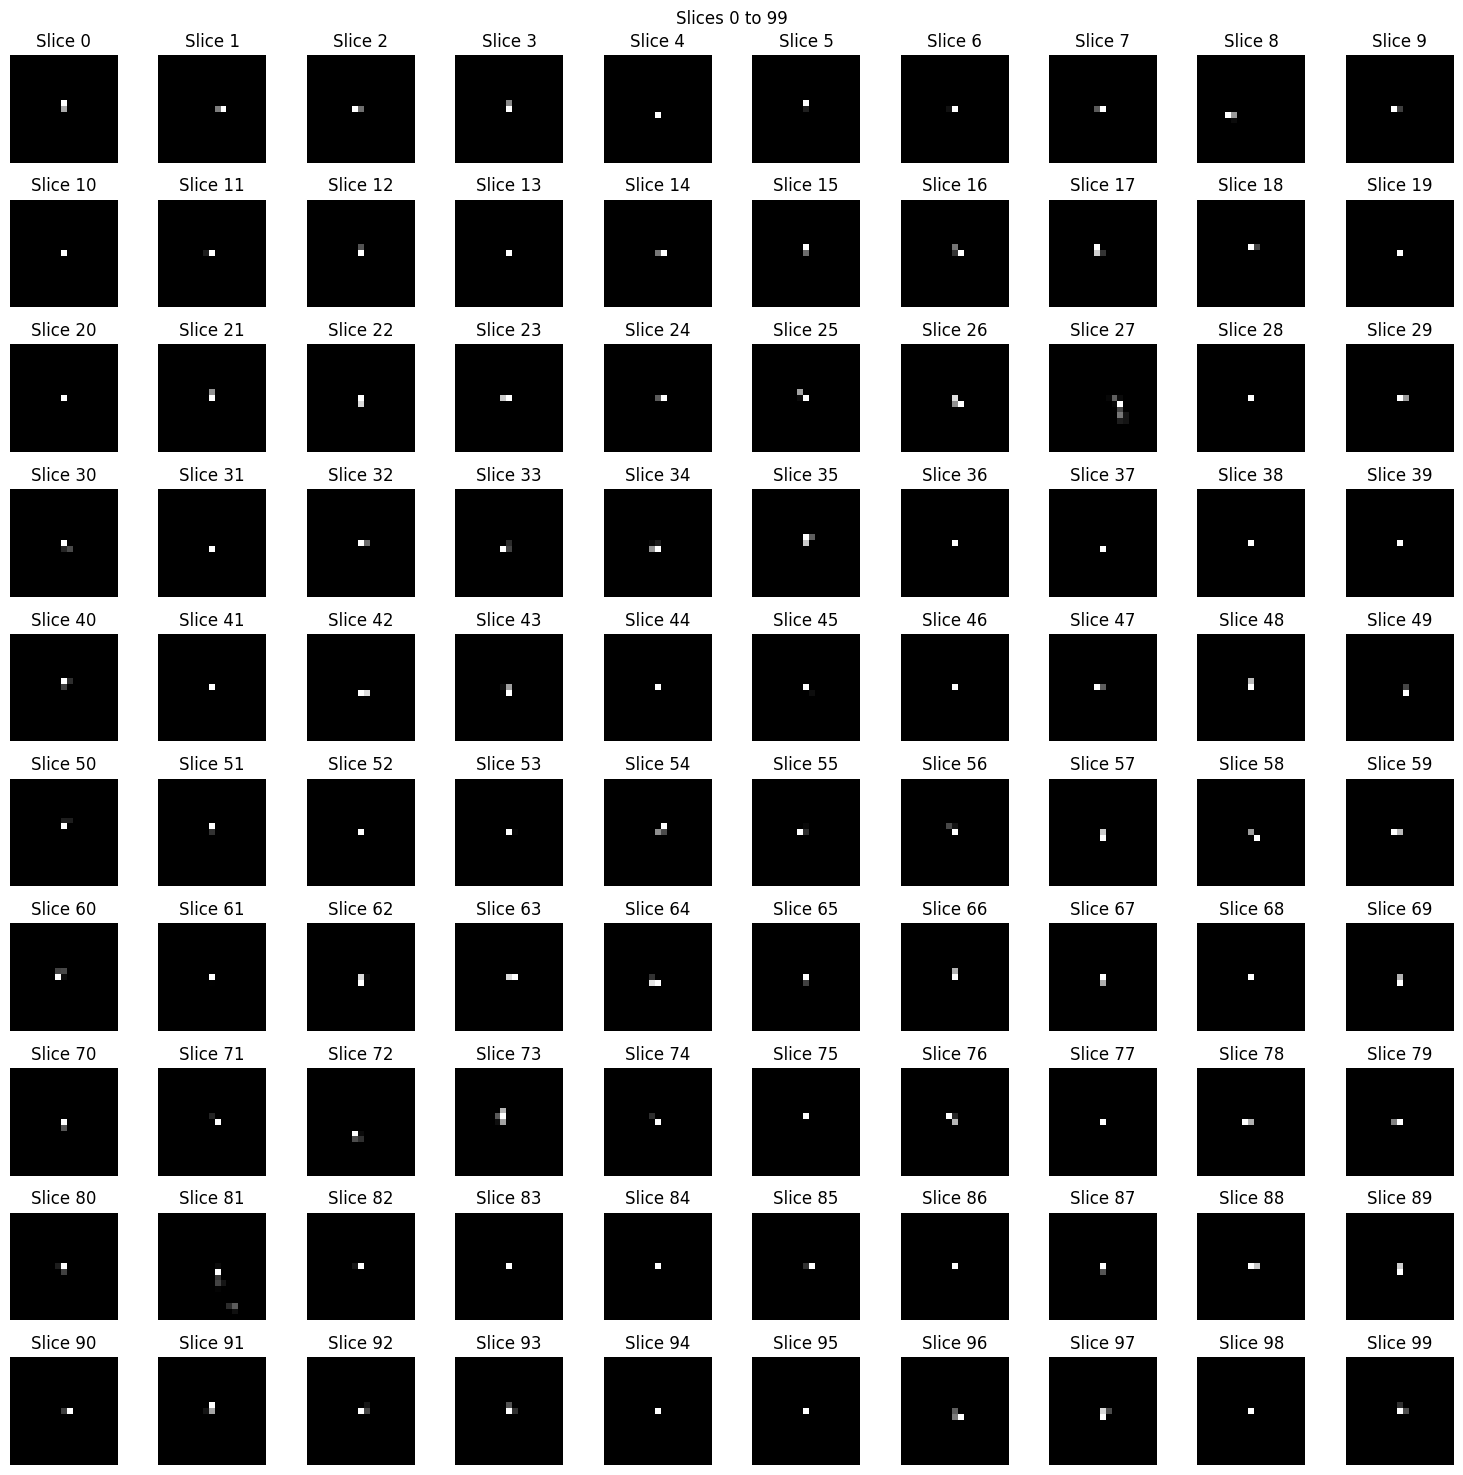

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import os

# Load the TIFF stack
file_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
tiff_stack = tiff.imread(file_path)

# Check the shape of the stack to ensure it is a 3D array
print(tiff_stack.shape)  # (num_slices, height, width)

# Verify the shape
if len(tiff_stack.shape) != 3:
    raise ValueError("The loaded TIFF stack is not a 3D array.")

# Function to plot multiple slices in a grid
def plot_slices(start, end):
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))
    fig.suptitle(f'Slices {start} to {end-1}')
    
    for i, ax in enumerate(axes.flat):
        slice_index = start + i
        if slice_index < end:
            ax.imshow(tiff_stack[slice_index], cmap='gray')
            ax.set_title(f'Slice {slice_index}')
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot the first 100 slices
plot_slices(0, 100)


With Random Noisy Images--random hits picked

In [3]:
# import numpy as np
# import random
# from PIL import Image
# from tqdm import tqdm
# import h5py

# class ImageProcessor:
#     """Image generation class"""    
    
#     def __init__(self, 
#                 num_to_generate,
#                 tiff_path, 
#                 dark_noise_path, 
#                 canvas_size = (64, 64), 
#                 max_electron_hits = 13):
#         """Initializes the ImageProcessor class

#         Args:
#             num_to_generate (int): Number of images to generate
#             tiff_path (str): Location of the tiff file that contains the electron hits
#             dark_noise_path (str): Path to the noisy data
#             canvas_size (tuple, optional): Size of the canvas to place the images on. Defaults to (64, 64).
#             max_electron_hits (int, optional): Maximum number of electron hits to place on the canvas. Defaults to 272.
#         """        
        
#         self.tiff_path = tiff_path
#         self.dark_noise_path = dark_noise_path
#         self.canvas_size = canvas_size
#         self.num_to_generate = num_to_generate
#         self.max_electron_hits = max_electron_hits
        
#         # Loads the images from the tiff file
#         self.images = self.load_images_from_tiff(tiff_path)
#         self.dark_noise_images = self.load_images_from_tiff(dark_noise_path)
        
#         # Creates a dark stack of the same size as the canvas
#         self.dark_noise = self.dark_stack(self.canvas_size[0])
    
#     def load_images_from_tiff(self, tiff_path):
#         """Loads the images from a tiff file

#         Args:
#             tiff_path (str): Path to the tiff file

#         Returns:
#             list: List of images
#         """        
#         with Image.open(tiff_path) as img:
#             images = []
#             for i in range(img.n_frames):
#                 img.seek(i)
#                 images.append(np.array(img))
#             return images
        
#     def noisy(self, noise_typ, image): 
#         """Adds noise to the images
        
#         Args:
#             noise_typ (str): Type of noise to add
#             image (numpy array): Image to add noise to
        
#         Returns:
#             numpy array: Noisy image
#         """
        
#         # if noise_typ == "gauss":
#         #     row,col,= image.shape
#         #     mean = 0             #taken from sparse frames of celeritas histogram . mean = -0.17  .RMSD = 1.319
#         #     var = 0.0001           #square of the standard deviation from sparse frames histogram
#         #     sigma = var**0.5
#         #     threshold = 8 #8ADU
#         #     gauss = np.random.normal(mean,sigma,(row,col))     #thresholding instead of adding noise
#         #     tnoisy = image + gauss                            #just making sure they're not exactly the same

#         #     for x in range(row):                    #Noise thresholding so that only positive noise is added to the empty pixels
#         #             for y in range(col):
#         #                                                 #each pixel should be an integer, not a floating point. Round each pixel after noise is added.
#         #                 if tnoisy[x][y] < threshold:      #trying not to wipe out smaller contributions
#         #                     tnoisy[x][y] = 0

#         #     noisy = np.round(tnoisy) #+ gauss)    #adding noise after thresholding to recreate the image
#         #     return noisy
#         if noise_typ == "gauss":
#             row, col = image.shape
#             mean = 0
#             var = 0.0001
#             sigma = var**0.5
#             threshold = 8
#             gauss = np.random.normal(mean, sigma, (row, col))
#             tnoisy = image + gauss

#             tnoisy[tnoisy < threshold] = 0
#             noisy = np.round(tnoisy)
#             return noisy

#     def deadcorr(self, image):
#         """Corrects the dead pixel within the dark reference frame by interpolating from near positions.
        
#         Args:
#             image (numpy array): Image to correct
#         """        
#         temp = image.copy()
#         temp[:, 248] = 0.5 * temp[:, 247] + 0.5 * temp[:, 246]
#         return temp

#     def dark_stack(self, imgsize):
#         """Creates a dark stack of the same size as the canvas.
        
#         Args:
#             imgsize (int): Size of the images in the stack
#         """        
#         dark_noise_stack_corrected = [self.deadcorr(image) for image in self.dark_noise_images]
#         dark_noise_stack_cropped = [image[512:512+imgsize, 512:512+imgsize] for image in dark_noise_stack_corrected]
#         return dark_noise_stack_cropped

    
#     # def place_image_on_canvas(self, positions=3, intensity_range=(10, 255)):
#     def place_image_on_canvas(self, positions=3):
#         """Places the electron hits on the canvas without specifying intensity range."""
#         canvas = np.zeros(self.canvas_size, dtype=np.uint8)
#         height, width = self.images[0].shape
#         max_x = self.canvas_size[1]
#         max_y = self.canvas_size[0]
#         bounding_boxes = []
#         centers = []
#         index_ = []
#         bounding_boxes_training = np.zeros((self.max_electron_hits, 5), dtype=np.float32)
#         centers_training = np.zeros((self.max_electron_hits, 3), dtype=np.float32)
        
#         for i in range(positions):
#             # Randomly select an electron hit
#             index = random.randint(0, len(self.images) - 1)
#             hit = self.images[index]
            
#             # Random position for placing the electron hit
#             x = random.randint(0, max_x - width)
#             y = random.randint(0, max_y - height)

#             y_min = y
#             y_max = y + height
#             x_min = x 
#             x_max = x + width

#             # Calculate the exact center based on pixel intensity
#             total_intensity = np.sum(hit)
#             if total_intensity > 0:
#                 y_coords, x_coords = np.indices(hit.shape)
#                 x_center = x + np.sum(x_coords * hit) / total_intensity
#                 y_center = y + np.sum(y_coords * hit) / total_intensity
#             else:
#                 x_center = x + width / 2
#                 y_center = y + height / 2
            
#             canvas[y_min:y_max, x_min:x_max] = hit
#             bounding_boxes.append((x_center-1, y_center-1, x_center+1, y_center+1))
#             bounding_boxes_training[i, 0] = 1
#             bounding_boxes_training[i, 1:] = [x_center-1, y_center-1, x_center+1, y_center+1]
#             centers.append((x_center, y_center))
#             centers_training[i, 0] = 1
#             centers_training[i, 1:] = [x_center, y_center]
#             index_.append(index)
        
#         # Apply Gaussian noise
#         canvas = self.noisy('gauss', canvas)
#         noise_int = np.random.randint(len(self.dark_noise))
#         canvas = canvas + self.dark_noise[noise_int]
            
#         return (canvas, bounding_boxes, bounding_boxes_training, centers, centers_training, index_, positions, noise_int)


    
#     #### USE THIS BLOCK TO GENERATE FIXED SET
#     # #def generate_multiple_images(self, intensity_range=(10, 255)):
#     # def generate_multiple_images(self, intensity_range=(200, 255)):
#     #     """Generates multiple images with specified intensity range for the objects."""        
#     #     results = []
#     #     for i in tqdm(range(self.num_to_generate), desc="Generating images"):
#     #         results.append(self.place_image_on_canvas(positions=3, intensity_range=intensity_range))
#     #     return results
    
#     #### USE THIS BLOCK TO GENERATE PADDED SET
#     def generate_multiple_images(self):
#         """Generates multiple images without specifying intensity range for the objects."""        
#         results = []
#         for i in tqdm(range(self.num_to_generate), desc="Generating images"):
#             positions = random.randint(13, self.max_electron_hits)
#             results.append(self.place_image_on_canvas(positions))
#         return results

        
#     def generate_noise_only_images(self, num_images):
#         """Generates images containing only noise, with no electron hits.

#         Args:
#             num_images (int): Number of noise-only images to generate.

#         Returns:
#             list: List of generated noise-only images.
#         """
#         noise_images = []
#         for _ in tqdm(range(num_images), desc="Generating noise-only images"):
#             # Create an empty canvas
#             canvas = np.zeros(self.canvas_size, dtype=np.uint8)

#             # Apply Gaussian noise
#             canvas = self.noisy('gauss', canvas)

#             # Add dark noise
#             noise_int = np.random.randint(len(self.dark_noise))
#             canvas = canvas + self.dark_noise[noise_int]

#             noise_images.append(canvas)

#         return noise_images
    
    

#     # def save_mixed_images_to_h5(self, data_with_objects, noise_images, filename):
#     #     """Mixes object-containing images with noise-only images and saves to an HDF5 file
        
#     #     Args:
#     #         data_with_objects (list): List of data with objects to save.
#     #         noise_images (list): List of noise-only images to save.
#     #         filename (str): Path to the HDF5 file.
#     #     """
#     #     total_images = len(data_with_objects) + len(noise_images)
#     #     combined_data = []

#     #     # Add labels: 1 for images with objects, 0 for noise-only images
#     #     for item in data_with_objects:
#     #         combined_data.append((item[0], item[4], 1))  # 1 indicates it contains objects
        
#     #     for noise_image in noise_images:
#     #         combined_data.append((noise_image, np.zeros((13, 3)), 0))  # 0 indicates noise-only
        
#     #     # Shuffle the combined data
#     #     random.shuffle(combined_data)

#     #     # Save to HDF5 file
#     #     with h5py.File(filename, 'w') as h5_file:
#     #         theimages = h5_file.create_dataset('images', shape=(total_images, 64, 64), dtype='uint8')
#     #         thecenters = h5_file.create_dataset('centers_training', shape=(total_images, 13, 3), dtype='float32')
#     #         labels = h5_file.create_dataset('labels', shape=(total_images,), dtype='uint8')
            
#     #         for i, (image, center, label) in enumerate(combined_data):
#     #             theimages[i] = image
#     #             thecenters[i] = center
#     #             labels[i] = label
    
#     def save_mixed_images_to_h5(self, data_with_objects, noise_images, filename):
#         """Saves object-containing images to an HDF5 file.

#         Args:
#             data_with_objects (list): List of data with objects to save.
#             filename (str): Path to the HDF5 file.
#         """
#         total_images = len(data_with_objects)  # Only count object-containing images now
#         combined_data = []

#         # Add labels: 1 for images with objects
#         for item in data_with_objects:
#             combined_data.append((item[0], item[4], 1))  # 1 indicates it contains objects
        
#         # Save to HDF5 file
#         with h5py.File(filename, 'w') as h5_file:
#             theimages = h5_file.create_dataset('images', shape=(total_images, 64, 64), dtype='uint8')
#             thecenters = h5_file.create_dataset('centers_training', shape=(total_images, 13, 3), dtype='float32')
#             labels = h5_file.create_dataset('labels', shape=(total_images,), dtype='uint8')
            
#             for i, (image, center, label) in enumerate(combined_data):
#                 theimages[i] = image
#                 thecenters[i] = center
#                 labels[i] = label



# tiff_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
# dark_noise_path = '/home/da886/ElectronCountingProject/1000fps_fullRolling.tif'

# # Creating an instance of ImageProcessor
# processor = ImageProcessor(200000, tiff_path, dark_noise_path, max_electron_hits=13)

# # Generating images with objects 
# # data_with_intensity_range = processor.generate_multiple_images()

# # Generating noise-only images
# # noise_only_images = processor.generate_noise_only_images(100000)

# # Save mixed dataset to an HDF5 file
# # processor.save_mixed_images_to_h5(data_with_intensity_range, noise_only_images, '/home/da886/Final Electron counting project/Images and Labels/1milFixed_Mixed_13.h5')


# # Generating images with objects 
# data_with_intensity_range = processor.generate_multiple_images()

# # Save only object-containing images to an HDF5 file
# processor.save_mixed_images_to_h5(data_with_intensity_range, [], '/home/da886/Final Electron counting project/Images and Labels/200KFixed_13.h5')



Generating images: 100%|██████████| 200000/200000 [01:13<00:00, 2705.01it/s]


specific index picked

In [4]:
# import numpy as np
# import random
# from PIL import Image
# from tqdm import tqdm
# import h5py

# class ImageProcessor:
#     """Image generation class"""    
    
#     def __init__(self, 
#                 num_to_generate,
#                 tiff_path, 
#                 dark_noise_path, 
#                 canvas_size = (64, 64), 
#                 max_electron_hits = 13):
#         """Initializes the ImageProcessor class

#         Args:
#             num_to_generate (int): Number of images to generate
#             tiff_path (str): Location of the tiff file that contains the electron hits
#             dark_noise_path (str): Path to the noisy data
#             canvas_size (tuple, optional): Size of the canvas to place the images on. Defaults to (64, 64).
#             max_electron_hits (int, optional): Maximum number of electron hits to place on the canvas. Defaults to 272.
#         """        
        
#         self.tiff_path = tiff_path
#         self.dark_noise_path = dark_noise_path
#         self.canvas_size = canvas_size
#         self.num_to_generate = num_to_generate
#         self.max_electron_hits = max_electron_hits
        
#         # Loads the images from the tiff file
#         self.images = self.load_images_from_tiff(tiff_path)
#         self.dark_noise_images = self.load_images_from_tiff(dark_noise_path)
        
#         # Creates a dark stack of the same size as the canvas
#         self.dark_noise = self.dark_stack(self.canvas_size[0])
    
#     def load_images_from_tiff(self, tiff_path):
#         """Loads the images from a tiff file

#         Args:
#             tiff_path (str): Path to the tiff file

#         Returns:
#             list: List of images
#         """        
#         with Image.open(tiff_path) as img:
#             images = []
#             for i in range(img.n_frames):
#                 img.seek(i)
#                 images.append(np.array(img))
#             return images
        
#     def noisy(self, noise_typ, image): 
#         """Adds noise to the images
        
#         Args:
#             noise_typ (str): Type of noise to add
#             image (numpy array): Image to add noise to
        
#         Returns:
#             numpy array: Noisy image
#         """
        
#         # if noise_typ == "gauss":
#         #     row,col,= image.shape
#         #     mean = 0             #taken from sparse frames of celeritas histogram . mean = -0.17  .RMSD = 1.319
#         #     var = 0.0001           #square of the standard deviation from sparse frames histogram
#         #     sigma = var**0.5
#         #     threshold = 8 #8ADU
#         #     gauss = np.random.normal(mean,sigma,(row,col))     #thresholding instead of adding noise
#         #     tnoisy = image + gauss                            #just making sure they're not exactly the same

#         #     for x in range(row):                    #Noise thresholding so that only positive noise is added to the empty pixels
#         #             for y in range(col):
#         #                                                 #each pixel should be an integer, not a floating point. Round each pixel after noise is added.
#         #                 if tnoisy[x][y] < threshold:      #trying not to wipe out smaller contributions
#         #                     tnoisy[x][y] = 0

#         #     noisy = np.round(tnoisy) #+ gauss)    #adding noise after thresholding to recreate the image
#         #     return noisy
#         if noise_typ == "gauss":
#             row, col = image.shape
#             mean = 0
#             var = 0.0001
#             sigma = var**0.5
#             threshold = 8
#             gauss = np.random.normal(mean, sigma, (row, col))
#             tnoisy = image + gauss

#             tnoisy[tnoisy < threshold] = 0
#             noisy = np.round(tnoisy)
#             return noisy

#     def deadcorr(self, image):
#         """Corrects the dead pixel within the dark reference frame by interpolating from near positions.
        
#         Args:
#             image (numpy array): Image to correct
#         """        
#         temp = image.copy()
#         temp[:, 248] = 0.5 * temp[:, 247] + 0.5 * temp[:, 246]
#         return temp

#     def dark_stack(self, imgsize):
#         """Creates a dark stack of the same size as the canvas.
        
#         Args:
#             imgsize (int): Size of the images in the stack
#         """        
#         dark_noise_stack_corrected = [self.deadcorr(image) for image in self.dark_noise_images]
#         dark_noise_stack_cropped = [image[512:512+imgsize, 512:512+imgsize] for image in dark_noise_stack_corrected]
#         return dark_noise_stack_cropped

    
#     # def place_image_on_canvas(self, positions=3, intensity_range=(10, 255)):
    # def place_image_on_canvas(self, positions=3):
    #     """Places the electron hits on the canvas using a fixed index."""
    #     canvas = np.zeros(self.canvas_size, dtype=np.uint8)
    #     height, width = self.images[0].shape
    #     max_x = self.canvas_size[1]
    #     max_y = self.canvas_size[0]
    #     bounding_boxes = []
    #     centers = []
    #     index_ = []
    #     bounding_boxes_training = np.zeros((self.max_electron_hits, 5), dtype=np.float32)
    #     centers_training = np.zeros((self.max_electron_hits, 3), dtype=np.float32)
        
    #     for i in range(positions):
    #         # Use the fixed index 6 for the electron hit
    #         index = 6
    #         hit = self.images[index]
            
    #         # Random position for placing the electron hit
    #         x = random.randint(0, max_x - width)
    #         y = random.randint(0, max_y - height)

    #         y_min = y
    #         y_max = y + height
    #         x_min = x 
    #         x_max = x + width

    #         # Calculate the exact center based on pixel intensity
    #         total_intensity = np.sum(hit)
    #         if total_intensity > 0:
    #             y_coords, x_coords = np.indices(hit.shape)
    #             x_center = x + np.sum(x_coords * hit) / total_intensity
    #             y_center = y + np.sum(y_coords * hit) / total_intensity
    #         else:
    #             x_center = x + width / 2
    #             y_center = y + height / 2
            
    #         canvas[y_min:y_max, x_min:x_max] = hit
    #         bounding_boxes.append((x_center-1, y_center-1, x_center+1, y_center+1))
    #         bounding_boxes_training[i, 0] = 1
    #         bounding_boxes_training[i, 1:] = [x_center-1, y_center-1, x_center+1, y_center+1]
    #         centers.append((x_center, y_center))
    #         centers_training[i, 0] = 1
    #         centers_training[i, 1:] = [x_center, y_center]
    #         index_.append(index)
        
    #     # Apply Gaussian noise
    #     canvas = self.noisy('gauss', canvas)
    #     noise_int = np.random.randint(len(self.dark_noise))
    #     canvas = canvas + self.dark_noise[noise_int]
            
    #     return (canvas, bounding_boxes, bounding_boxes_training, centers, centers_training, index_, positions, noise_int)

#         # return (canvas, bounding_boxes, bounding_boxes_training, centers, centers_training, index_, positions)

    
#     #### USE THIS BLOCK TO GENERATE FIXED SET
#     # #def generate_multiple_images(self, intensity_range=(10, 255)):
#     # def generate_multiple_images(self, intensity_range=(200, 255)):
#     #     """Generates multiple images with specified intensity range for the objects."""        
#     #     results = []
#     #     for i in tqdm(range(self.num_to_generate), desc="Generating images"):
#     #         results.append(self.place_image_on_canvas(positions=3, intensity_range=intensity_range))
#     #     return results
    
#     #### USE THIS BLOCK TO GENERATE PADDED SET
#     def generate_multiple_images(self):
#         """Generates multiple images without specifying intensity range for the objects."""        
#         results = []
#         for i in tqdm(range(self.num_to_generate), desc="Generating images"):
#             positions = random.randint(13, self.max_electron_hits)
#             results.append(self.place_image_on_canvas(positions))
#         return results

        
#     def generate_noise_only_images(self, num_images):
#         """Generates images containing only noise, with no electron hits.

#         Args:
#             num_images (int): Number of noise-only images to generate.

#         Returns:
#             list: List of generated noise-only images.
#         """
#         noise_images = []
#         for _ in tqdm(range(num_images), desc="Generating noise-only images"):
#             # Create an empty canvas
#             canvas = np.zeros(self.canvas_size, dtype=np.uint8)

#             # Apply Gaussian noise
#             canvas = self.noisy('gauss', canvas)

#             # Add dark noise
#             noise_int = np.random.randint(len(self.dark_noise))
#             canvas = canvas + self.dark_noise[noise_int]

#             noise_images.append(canvas)

#         return noise_images
    
    

#     # def save_mixed_images_to_h5(self, data_with_objects, noise_images, filename):
#     #     """Mixes object-containing images with noise-only images and saves to an HDF5 file
        
#     #     Args:
#     #         data_with_objects (list): List of data with objects to save.
#     #         noise_images (list): List of noise-only images to save.
#     #         filename (str): Path to the HDF5 file.
#     #     """
#     #     total_images = len(data_with_objects) + len(noise_images)
#     #     combined_data = []

#     #     # Add labels: 1 for images with objects, 0 for noise-only images
#     #     for item in data_with_objects:
#     #         combined_data.append((item[0], item[4], 1))  # 1 indicates it contains objects
        
#     #     for noise_image in noise_images:
#     #         combined_data.append((noise_image, np.zeros((13, 3)), 0))  # 0 indicates noise-only
        
#     #     # Shuffle the combined data
#     #     random.shuffle(combined_data)

#     #     # Save to HDF5 file
#     #     with h5py.File(filename, 'w') as h5_file:
#     #         theimages = h5_file.create_dataset('images', shape=(total_images, 64, 64), dtype='uint8')
#     #         thecenters = h5_file.create_dataset('centers_training', shape=(total_images, 13, 3), dtype='float32')
#     #         labels = h5_file.create_dataset('labels', shape=(total_images,), dtype='uint8')
            
#     #         for i, (image, center, label) in enumerate(combined_data):
#     #             theimages[i] = image
#     #             thecenters[i] = center
#     #             labels[i] = label
    
#     def save_mixed_images_to_h5(self, data_with_objects, noise_images, filename):
#         """Saves object-containing images to an HDF5 file.

#         Args:
#             data_with_objects (list): List of data with objects to save.
#             filename (str): Path to the HDF5 file.
#         """
#         total_images = len(data_with_objects)  # Only count object-containing images now
#         combined_data = []

#         # Add labels: 1 for images with objects
#         for item in data_with_objects:
#             combined_data.append((item[0], item[4], 1))  # 1 indicates it contains objects
        
#         # Save to HDF5 file
#         with h5py.File(filename, 'w') as h5_file:
#             theimages = h5_file.create_dataset('images', shape=(total_images, 64, 64), dtype='uint8')
#             thecenters = h5_file.create_dataset('centers_training', shape=(total_images, 13, 3), dtype='float32')
#             labels = h5_file.create_dataset('labels', shape=(total_images,), dtype='uint8')
            
#             for i, (image, center, label) in enumerate(combined_data):
#                 theimages[i] = image
#                 thecenters[i] = center
#                 labels[i] = label



# tiff_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
# dark_noise_path = '/home/da886/ElectronCountingProject/1000fps_fullRolling.tif'

# # Creating an instance of ImageProcessor
# processor = ImageProcessor(500, tiff_path, dark_noise_path, max_electron_hits=13)

# # Generating images with objects 
# # data_with_intensity_range = processor.generate_multiple_images()

# # Generating noise-only images
# # noise_only_images = processor.generate_noise_only_images(100000)

# # Save mixed dataset to an HDF5 file
# # processor.save_mixed_images_to_h5(data_with_intensity_range, noise_only_images, '/home/da886/Final Electron counting project/Images and Labels/1milFixed_Mixed_13.h5')


# # Generating images with objects 
# data_with_intensity_range = processor.generate_multiple_images()

# # Save only object-containing images to an HDF5 file
# processor.save_mixed_images_to_h5(data_with_intensity_range, [], '/home/da886/Final Electron counting project/Images and Labels/500AnalysisFixed-index6_13.h5')



In [10]:
# import numpy as np
# import random
# import matplotlib.pyplot as plt
# import tifffile as tiff
# from tqdm import tqdm

# # Load the TIFF stacks for electron hits and dark noise
# electron_tiff_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
# dark_noise_path = '/home/da886/ElectronCountingProject/1000fps_fullRolling.tif'

# electron_hits_stack = tiff.imread(electron_tiff_path)
# dark_noise_stack = tiff.imread(dark_noise_path)

# # Define the ImageProcessor class
# class ImageProcessor:
#     def __init__(self, tiff_stack, dark_noise_stack, canvas_size=(64, 64), max_electron_hits=13):
#         """Initializes the ImageProcessor class"""
#         self.images = tiff_stack
#         self.dark_noise_images = dark_noise_stack
#         self.canvas_size = canvas_size
#         self.max_electron_hits = max_electron_hits
        
#         # Creates a dark stack of the same size as the canvas
#         self.dark_noise = self.dark_stack(self.canvas_size[0])

#     def load_images_from_tiff(self, tiff_path):
#         """Loads the images from a tiff file"""
#         with Image.open(tiff_path) as img:
#             images = []
#             for i in range(img.n_frames):
#                 img.seek(i)
#                 images.append(np.array(img))
#             return images

#     def noisy(self, noise_typ, image): 
#         """Adds noise to the images"""
#         if noise_typ == "gauss":
#             row, col = image.shape
#             mean = 0
#             var = 0.001  # Increase or decrease this for more or less noise
#             sigma = var ** 0.5
#             threshold = 8  # Adjust this as necessary
#             gauss = np.random.normal(mean, sigma, (row, col))
#             tnoisy = image + gauss
#             tnoisy[tnoisy < threshold] = 0
#             noisy = np.round(tnoisy)
#             return noisy

#     def deadcorr(self, image):
#         """Corrects the dead pixel within the dark reference frame by interpolating from near positions."""
#         temp = image.copy()
#         temp[:, 248] = 0.5 * temp[:, 247] + 0.5 * temp[:, 246]
#         return temp

#     def dark_stack(self, imgsize):
#         """Creates a dark stack of the same size as the canvas."""
#         dark_noise_stack_corrected = [self.deadcorr(image) for image in self.dark_noise_images]
#         dark_noise_stack_cropped = [image[512:512+imgsize, 512:512+imgsize] for image in dark_noise_stack_corrected]
#         return dark_noise_stack_cropped

#     def place_image_on_canvas(self, positions=3):
#         """Places the electron hits on the canvas and adds noise."""
#         canvas = np.zeros(self.canvas_size, dtype=np.uint8)
#         height, width = self.images[0].shape
#         max_x = self.canvas_size[1]
#         max_y = self.canvas_size[0]
#         bounding_boxes = []
#         centers = []
#         index_ = []
#         bounding_boxes_training = np.zeros((self.max_electron_hits, 5), dtype=np.float32)
#         centers_training = np.zeros((self.max_electron_hits, 3), dtype=np.float32)

#         for i in range(positions):
#             # Use the fixed index 6 for the electron hit
#             index = 6
#             hit = self.images[index]

#             # Random position for placing the electron hit
#             x = random.randint(0, max_x - width)
#             y = random.randint(0, max_y - height)

#             y_min = y
#             y_max = y + height
#             x_min = x 
#             x_max = x + width

#             # Calculate the exact center based on pixel intensity
#             total_intensity = np.sum(hit)
#             if total_intensity > 0:
#                 y_coords, x_coords = np.indices(hit.shape)
#                 x_center = x + np.sum(x_coords * hit) / total_intensity
#                 y_center = y + np.sum(y_coords * hit) / total_intensity
#             else:
#                 x_center = x + width / 2
#                 y_center = y + height / 2

#             canvas[y_min:y_max, x_min:x_max] = hit
#             bounding_boxes.append((x_center-1, y_center-1, x_center+1, y_center+1))
#             bounding_boxes_training[i, 0] = 1
#             bounding_boxes_training[i, 1:] = [x_center-1, y_center-1, x_center+1, y_center+1]
#             centers.append((x_center, y_center))
#             centers_training[i, 0] = 1
#             centers_training[i, 1:] = [x_center, y_center]
#             index_.append(index)

#         # Apply Gaussian noise
#         canvas = self.noisy('gauss', canvas)

#         # Apply dark noise
#         noise_int = np.random.randint(len(self.dark_noise))
#         canvas = canvas + self.dark_noise[noise_int]

#         return (canvas, bounding_boxes, bounding_boxes_training, centers, centers_training, index_, positions)

# # Create an instance of ImageProcessor
# processor = ImageProcessor(electron_hits_stack, dark_noise_stack)

# # Generate 20 images with exactly 10 spots on each image
# generated_images_with_noise = []
# centers_list_with_noise = []

# for _ in range(20):
#     canvas, bounding_boxes, bounding_boxes_training, centers, centers_training, index_, positions = processor.place_image_on_canvas(positions=10)
#     generated_images_with_noise.append(canvas)
#     centers_list_with_noise.append(centers)

# # Plot these generated images with the centers labeled
# fig, axes = plt.subplots(4, 5, figsize=(15, 12))

# for i, ax in enumerate(axes.flat):
#     ax.imshow(generated_images_with_noise[i], cmap='gray')
#     for j, center in enumerate(centers_list_with_noise[i]):
#         ax.plot(center[0], center[1], 'rx')  # Marking the center with a red 'x'
#         # Adding labels to each spot (e.g., index number of the spot)
#         ax.text(center[0], center[1], f"{j+1}", color='white', fontsize=12, ha='center', va='center')
#     ax.set_title(f'Image {i+1} with 10 Spots and Noise')
#     ax.axis('off')

# plt.tight_layout()
# plt.show()


Images without Noise

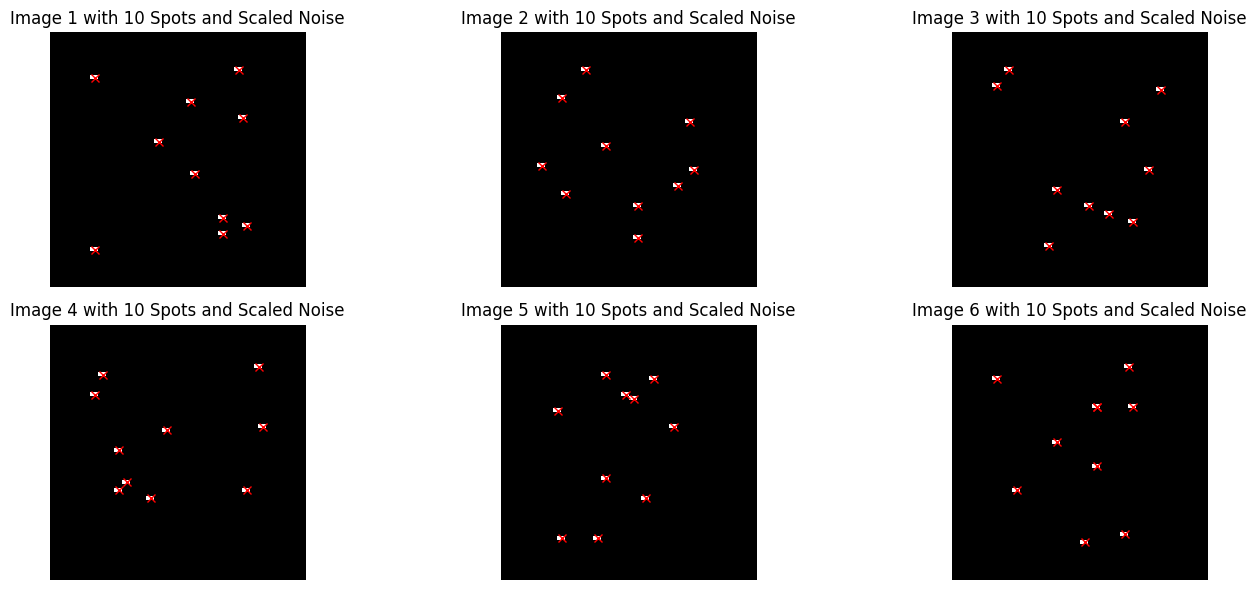

In [34]:
# import numpy as np
# import random
# import matplotlib.pyplot as plt
# import tifffile as tiff
# from tqdm import tqdm

# # Load the TIFF stacks for electron hits and dark noise
# electron_tiff_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
# dark_noise_path = '/home/da886/ElectronCountingProject/1000fps_fullRolling.tif'



# electron_hits_stack = tiff.imread(electron_tiff_path)
# dark_noise_stack = tiff.imread(dark_noise_path)

# # Adjust the dark noise intensity scaling and generate new images

# class ImageProcessor:
#     def __init__(self, tiff_stack, dark_noise_stack, canvas_size=(64, 64), max_electron_hits=13):
#         """Initializes the ImageProcessor class"""
#         self.images = tiff_stack
#         self.dark_noise_images = dark_noise_stack
#         self.canvas_size = canvas_size
#         self.max_electron_hits = max_electron_hits
        
#         # Creates a dark stack of the same size as the canvas
#         self.dark_noise = self.dark_stack(self.canvas_size[0])

#     def noisy(self, noise_typ, image):
#      if noise_typ == "gauss":
#             row,col,= image.shape
#             mean = 0             #taken from sparse frames of celeritas histogram . mean = -0.17  .RMSD = 1.319
#             var = 0.0001           #square of the standard deviation from sparse frames histogram
#             sigma = var**0.5
#             threshold = 8 #8ADU
#             gauss = np.random.normal(mean,sigma,(row,col))     #thresholding instead of adding noise
#             tnoisy = image + gauss                            #just making sure they're not exactly the same

#             for x in range(row):                    #Noise thresholding so that only positive noise is added to the empty pixels
#                     for y in range(col):
#                                                         #each pixel should be an integer, not a floating point. Round each pixel after noise is added.
#                         if tnoisy[x][y] < threshold:      #trying not to wipe out smaller contributions
#                             tnoisy[x][y] = 0

#             noisy = np.round(tnoisy) #+ gauss)    #adding noise after thresholding to recreate the image
#             return noisy

#     def deadcorr(self, image):
#         """Corrects the dead pixel within the dark reference frame by interpolating from near positions."""
#         temp = image.copy()
#         temp[:, 248] = 0.5 * temp[:, 247] + 0.5 * temp[:, 246]
#         return temp

#     def dark_stack(self, imgsize):
#         """Creates a dark stack of the same size as the canvas."""
#         dark_noise_stack_corrected = [self.deadcorr(image) for image in self.dark_noise_images]
#         dark_noise_stack_cropped = [image[512:512+imgsize, 512:512+imgsize] for image in dark_noise_stack_corrected]
#         return dark_noise_stack_cropped

#     def place_image_on_canvas(self, positions=3):
#         """Places the electron hits on the canvas using a fixed index."""
#         canvas = np.zeros(self.canvas_size, dtype=np.float32)  # Use float32 for better precision
#         height, width = self.images[0].shape
#         max_x = self.canvas_size[1]
#         max_y = self.canvas_size[0]
#         bounding_boxes = []
#         centers = []
#         index_ = []
#         bounding_boxes_training = np.zeros((self.max_electron_hits, 5), dtype=np.float32)
#         centers_training = np.zeros((self.max_electron_hits, 3), dtype=np.float32)

#         for i in range(positions):
#             # Use the fixed index 6 for the electron hit
#             index = 6
#             hit = self.images[index] * 20  # Increase the intensity of the electron hit
            
#             # Random position for placing the electron hit
#             x = random.randint(0, max_x - width)
#             y = random.randint(0, max_y - height)

#             y_min = y
#             y_max = y + height
#             x_min = x
#             x_max = x + width

#             # Calculate the exact center based on pixel intensity
#             total_intensity = np.sum(hit)
#             if total_intensity > 0:
#                 y_coords, x_coords = np.indices(hit.shape)
#                 x_center = x + np.sum(x_coords * hit) / total_intensity
#                 y_center = y + np.sum(y_coords * hit) / total_intensity
#             else:
#                 x_center = x + width / 2
#                 y_center = y + height / 2

#             canvas[y_min:y_max, x_min:x_max] = np.clip(canvas[y_min:y_max, x_min:x_max] + hit, 0, 255)  # Prevent overlap overflow
#             bounding_boxes.append((x_center - 1, y_center - 1, x_center + 1, y_center + 1))
#             bounding_boxes_training[i, 0] = 1
#             bounding_boxes_training[i, 1:] = [x_center - 1, y_center - 1, x_center + 1, y_center + 1]
#             centers.append((x_center, y_center))
#             centers_training[i, 0] = 1
#             centers_training[i, 1:] = [x_center, y_center]
#             index_.append(index)

#         # Convert back to uint8 for display purposes
#         canvas = np.clip(canvas, 0, 255).astype(np.uint8)
        
#         return (canvas, bounding_boxes, bounding_boxes_training, centers, centers_training, index_, positions)



# # Create an instance of ImageProcessor
# processor = ImageProcessor(electron_hits_stack, dark_noise_stack)

# # Generate 10 images with exactly 10 spots on each image
# generated_images_with_noise_scaled = []
# centers_list_with_noise_scaled = []

# for _ in range(6):
#     canvas, bounding_boxes, bounding_boxes_training, centers, centers_training, index_, positions = processor.place_image_on_canvas(positions=10)
#     generated_images_with_noise_scaled.append(canvas)
#     centers_list_with_noise_scaled.append(centers)

# # Plot these generated images without the labels on the spots
# fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# for i, ax in enumerate(axes.flat):
#     ax.imshow(generated_images_with_noise_scaled[i], cmap='gray')
#     for center in centers_list_with_noise_scaled[i]:
#         ax.plot(center[0], center[1], 'rx')  # Marking the center with a red 'x'
#     ax.set_title(f'Image {i+1} with 10 Spots and Scaled Noise')
#     ax.axis('off')

# plt.tight_layout()
# plt.show()




In [146]:
# import numpy as np
# import random
# import matplotlib.pyplot as plt
# import tifffile as tiff
# from tqdm import tqdm

# # Load the TIFF stacks for electron hits and dark noise
# electron_tiff_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
# dark_noise_path = '/home/da886/ElectronCountingProject/1000fps_fullRolling.tif'



# electron_hits_stack = tiff.imread(electron_tiff_path)
# dark_noise_stack = tiff.imread(dark_noise_path)

# # Adjust the dark noise intensity scaling and generate new images

# class ImageProcessor:
#     def __init__(self, tiff_stack, dark_noise_stack, canvas_size=(64, 64), max_electron_hits=13):
#         """Initializes the ImageProcessor class"""
#         self.images = tiff_stack
#         self.dark_noise_images = dark_noise_stack
#         self.canvas_size = canvas_size
#         self.max_electron_hits = max_electron_hits
        
#         # Creates a dark stack of the same size as the canvas
#         self.dark_noise = self.dark_stack(self.canvas_size[0])

#     def noisy(self, noise_typ, image):
#      if noise_typ == "gauss":
#             row,col,= image.shape
#             mean = 0             #taken from sparse frames of celeritas histogram . mean = -0.17  .RMSD = 1.319
#             var = 0.0001           #square of the standard deviation from sparse frames histogram
#             sigma = var**0.5
#             threshold = 8 #8ADU
#             gauss = np.random.normal(mean,sigma,(row,col))     #thresholding instead of adding noise
#             tnoisy = image + gauss                            #just making sure they're not exactly the same

#             for x in range(row):                    #Noise thresholding so that only positive noise is added to the empty pixels
#                     for y in range(col):
#                                                         #each pixel should be an integer, not a floating point. Round each pixel after noise is added.
#                         if tnoisy[x][y] < threshold:      #trying not to wipe out smaller contributions
#                             tnoisy[x][y] = 0

#             noisy = np.round(tnoisy) #+ gauss)    #adding noise after thresholding to recreate the image
#             return noisy

#     def deadcorr(self, image):
#         """Corrects the dead pixel within the dark reference frame by interpolating from near positions."""
#         temp = image.copy()
#         temp[:, 248] = 0.5 * temp[:, 247] + 0.5 * temp[:, 246]
#         return temp

#     def dark_stack(self, imgsize):
#         """Creates a dark stack of the same size as the canvas."""
#         dark_noise_stack_corrected = [self.deadcorr(image) for image in self.dark_noise_images]
#         dark_noise_stack_cropped = [image[512:512+imgsize, 512:512+imgsize] for image in dark_noise_stack_corrected]
#         return dark_noise_stack_cropped

#     def place_image_on_canvas(self, positions=3):
#         """Places the electron hits on the canvas and adds noise."""
#         canvas = np.zeros(self.canvas_size, dtype=np.float32)  # Use float32 for better precision
#         height, width = self.images[0].shape
#         max_x = self.canvas_size[1]
#         max_y = self.canvas_size[0]
#         # bounding_boxes = []
#         centers = []
#         index_ = []
#         # bounding_boxes_training = np.zeros((self.max_electron_hits, 5), dtype=np.float32)
#         centers_training = np.zeros((self.max_electron_hits, 3), dtype=np.float32)

#         for i in range(positions):
#             x = random.randint(1 - width//2, max_x - width//2 - 1)
#             y = random.randint(1 - height//2, max_y - height//2 - 1)
#             index = 95
#             hit = self.images[index]

#             y_min = y
#             y_max = y + height
#             x_min = x 
#             x_max = x + width
            
#             x_center = x + width / 2 
#             y_center = y + height / 2
            
#             # if y_min < 0:
#             #     hit = hit[y_min*-1:, :]
#             #     y_min = 0

#             # if y_max > max_y:
#             #     hit = hit[:-(y_max-max_y), :]
#             #     y_max = max_y
                
#             # if x_min < 0:
#             #     hit = hit[:, x_min*-1:]
#             #     x_min = 0
            
#             # if x_max > max_x:
#             #     hit = hit[:, :-(x_max-max_x)]
#             #     x_max = max_x
#             # Calculate the exact center based on pixel intensity
#             total_intensity = np.sum(hit)
#             if total_intensity > 0:
#                 y_coords, x_coords = np.indices(hit.shape)
#                 x_center = x + np.sum(x_coords * hit) / total_intensity
#                 y_center = y + np.sum(y_coords * hit) / total_intensity
#             else:
#                 x_center = x + width / 2
#                 y_center = y + height / 2
#             canvas[y_min:y_max, x_min:x_max] = np.clip(canvas[y_min:y_max, x_min:x_max] + hit, 0, 255)
#             # bounding_boxes.append((x_center - 1, y_center - 1, x_center + 1, y_center + 1))
#             # bounding_boxes_training[i, 0] = 1
#             # bounding_boxes_training[i, 1:] = [x_center - 1, y_center - 1, x_center + 1, y_center + 1]
#             centers.append((x_center, y_center))
#             centers_training[i, 0] = 1
#             centers_training[i, 1:] = [x_center, y_center]
#             index_.append(index)

#         # Apply Gaussian noise
#         canvas = self.noisy('gauss', canvas)

#         # # Apply scaled down dark noise
#         # noise_int = np.random.randint(len(self.dark_noise))
#         # canvas = canvas + self.dark_noise[noise_int]  # Scaling down dark noise

#         # Clip values to valid range for display
#         canvas = np.clip(canvas, 0, 255).astype(np.uint8)
        
#         # return (canvas, bounding_boxes, bounding_boxes_training, centers, centers_training, index_, positions)
#         return (canvas, centers, centers_training, index_, positions)



# # Create an instance of ImageProcessor
# processor = ImageProcessor(electron_hits_stack, dark_noise_stack)

# # Generate 10 images with exactly 10 spots on each image
# generated_images_with_noise_scaled = []
# centers_list_with_noise_scaled = []

# for _ in range(6):
#     canvas,  centers, centers_training, index_, positions = processor.place_image_on_canvas(positions=13)
#     generated_images_with_noise_scaled.append(canvas)
#     centers_list_with_noise_scaled.append(centers)

# # Plot these generated images without the labels on the spots
# fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# for i, ax in enumerate(axes.flat):
#     ax.imshow(generated_images_with_noise_scaled[i], cmap='gray')
#     for center in centers_list_with_noise_scaled[i]:
#         ax.plot(center[0], center[1], 'ro', markersize=2)  # Adjust the marker size (e.g., 8)
#     ax.set_title(f'Image {i+1} with 10 Spots and Scaled Noise')
#     ax.axis('off')

# plt.tight_layout()
# plt.show()




ValueError: operands could not be broadcast together with shapes (0,0) (19,19) 

In [29]:
# import numpy as np
# import random
# from PIL import Image
# from tqdm import tqdm
# import h5py

# class ImageProcessor:
#     """Image generation class"""    
    
#     def __init__(self, num_to_generate, tiff_path, dark_noise_path, canvas_size=(64, 64), max_electron_hits=13):
#         """Initializes the ImageProcessor class"""
#         self.tiff_path = tiff_path
#         self.dark_noise_path = dark_noise_path
#         self.canvas_size = canvas_size
#         self.num_to_generate = num_to_generate
#         self.max_electron_hits = max_electron_hits
        
#         # Loads the images from the tiff file
#         self.images = self.load_images_from_tiff(tiff_path)
#         self.dark_noise_images = self.load_images_from_tiff(dark_noise_path)
        
#         # Creates a dark stack of the same size as the canvas
#         self.dark_noise = self.dark_stack(self.canvas_size[0])
    
#     def load_images_from_tiff(self, tiff_path):
#         """Loads the images from a tiff file"""
#         with Image.open(tiff_path) as img:
#             images = []
#             for i in range(img.n_frames):
#                 img.seek(i)
#                 images.append(np.array(img))
#             return images
        
#     def noisy(self, noise_typ, image): 
#         """Adds noise to the images"""
#         if noise_typ == "gauss":
#             row, col = image.shape
#             mean = 0
#             var = 0.0001
#             sigma = var ** 0.5
#             threshold = 8
#             gauss = np.random.normal(mean, sigma, (row, col))
#             tnoisy = image + gauss

#             tnoisy[tnoisy < threshold] = 0
#             noisy = np.round(tnoisy)
#             return noisy

#     def deadcorr(self, image):
#         """Corrects the dead pixel within the dark reference frame by interpolating from near positions."""
#         temp = image.copy()
#         temp[:, 248] = 0.5 * temp[:, 247] + 0.5 * temp[:, 246]
#         return temp

#     def dark_stack(self, imgsize):
#         """Creates a dark stack of the same size as the canvas."""
#         dark_noise_stack_corrected = [self.deadcorr(image) for image in self.dark_noise_images]
#         dark_noise_stack_cropped = [image[512:512+imgsize, 512:512+imgsize] for image in dark_noise_stack_corrected]
#         return dark_noise_stack_cropped

#     def place_image_on_canvas(self, positions=3):
    
#         """Places the electron hits on the canvas without specifying intensity range."""
#         canvas = np.zeros(self.canvas_size, dtype=np.uint8)
#         height, width = self.images[0].shape
#         max_x = self.canvas_size[1]
#         max_y = self.canvas_size[0]
#         bounding_boxes = []
#         centers = []
#         index_ = []
#         bounding_boxes_training = np.zeros((self.max_electron_hits, 5), dtype=np.float32)
#         centers_training = np.zeros((self.max_electron_hits, 3), dtype=np.float32)
        
#         for i in range(positions):
#             # Randomly select an electron hit
#             # index = random.randint(0, len(self.images) - 1)
#             index = 84
#             hit = self.images[index]
            
#             # Random position for placing the electron hit
#             x = random.randint(0, max_x - width)
#             y = random.randint(0, max_y - height)

#             y_min = y
#             y_max = y + height
#             x_min = x 
#             x_max = x + width

#             # Calculate the exact center based on pixel intensity
#             total_intensity = np.sum(hit)
#             if total_intensity > 0:
#                 y_coords, x_coords = np.indices(hit.shape)
#                 x_center = x + np.sum(x_coords * hit) / total_intensity
#                 y_center = y + np.sum(y_coords * hit) / total_intensity
#             else:
#                 x_center = x + width / 2
#                 y_center = y + height / 2
            
#             canvas[y_min:y_max, x_min:x_max] = np.clip(canvas[y_min:y_max, x_min:x_max] + hit, 0, 255)
#             bounding_boxes.append((x_center-1, y_center-1, x_center+1, y_center+1))
#             bounding_boxes_training[i, 0] = 1
#             bounding_boxes_training[i, 1:] = [x_center-1, y_center-1, x_center+1, y_center+1]
#             centers.append((x_center, y_center))
#             centers_training[i, 0] = 1
#             centers_training[i, 1:] = [x_center, y_center]
#             index_.append(index)

#         # # Apply Gaussian noise
#         # canvas = self.noisy('gauss', canvas)

#         # # Apply scaled down dark noise
#         # noise_int = np.random.randint(len(self.dark_noise))
#         # canvas = canvas + self.dark_noise[noise_int]  # Scaling down dark noise

#         # Clip values to valid range for display
#         # canvas = np.clip(canvas, 0, 255).astype(np.uint8) 
        
#         return (canvas, bounding_boxes, bounding_boxes_training, centers, centers_training, index_, positions)

#     def generate_multiple_images(self):
#         """Generates multiple images without specifying intensity range for the objects."""        
#         results = []
#         for i in tqdm(range(self.num_to_generate), desc="Generating images"):
#             positions = random.randint(13, self.max_electron_hits)
#             results.append(self.place_image_on_canvas(positions))
#         return results

#     def save_mixed_images_to_h5(self, data_with_objects, noise_images, filename):
#         """Saves object-containing images to an HDF5 file."""
#         total_images = len(data_with_objects)  # Only count object-containing images now
#         combined_data = []

#         # Add labels: 1 for images with objects
#         for item in data_with_objects:
#             combined_data.append((item[0], item[4], 1))  # 1 indicates it contains objects
        
#         # Save to HDF5 file
#         with h5py.File(filename, 'w') as h5_file:
#             theimages = h5_file.create_dataset('images', shape=(total_images, 64, 64), dtype='uint8')
#             thecenters = h5_file.create_dataset('centers_training', shape=(total_images, 13, 3), dtype='float32')
#             labels = h5_file.create_dataset('labels', shape=(total_images,), dtype='uint8')
            
#             for i, (image, center, label) in enumerate(combined_data):
#                 theimages[i] = image
#                 thecenters[i] = center
#                 labels[i] = label


# # Example usage
# tiff_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
# dark_noise_path = '/home/da886/ElectronCountingProject/1000fps_fullRolling.tif'

# # Creating an instance of ImageProcessor
# processor = ImageProcessor(30000, tiff_path, dark_noise_path, max_electron_hits=13)

# # Generating images with objects
# data_with_intensity_range = processor.generate_multiple_images()

# # Save only object-containing images to an HDF5 file
# processor.save_mixed_images_to_h5(data_with_intensity_range, [], '/home/da886/Final Electron counting project/Images and Labels/30KNoNoiseFixed-index84_13.h5')


Generating images: 100%|██████████| 30000/30000 [00:09<00:00, 3196.42it/s]


Use this for sparse spots

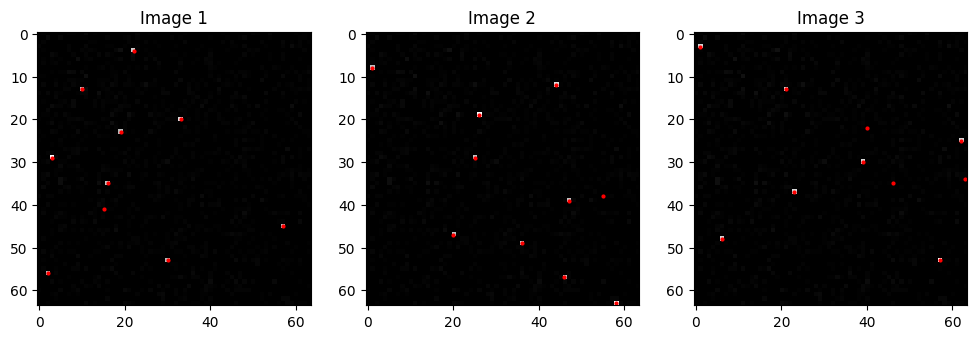

In [294]:
# # Adjust the center calculation to ensure the midpoint is correct
# class ImageProcessorAdjustedCorrectMidpoints:
#     """Image generation class with fixed spots and corrected midpoint calculation."""    
    
#     def __init__(self, num_to_generate, tiff_path, dark_noise_path, canvas_size=(64, 64), fixed_spots=10):
#         """Initializes the ImageProcessor class with a fixed number of electron spots."""
#         self.tiff_path = tiff_path
#         self.dark_noise_path = dark_noise_path
#         self.canvas_size = canvas_size
#         self.num_to_generate = num_to_generate
#         self.fixed_spots = fixed_spots
        
#         # Load only the relevant frames (e.g., index 84) from the TIFF file
#         self.images = [self.load_image_from_tiff(tiff_path, 95)]
#         self.dark_noise_images = [self.load_image_from_tiff(dark_noise_path, 0)]
        
#         # Creates a dark stack of the same size as the canvas
#         self.dark_noise = self.dark_stack(self.canvas_size[0])
    
#     def load_image_from_tiff(self, tiff_path, frame_index):
#         """Loads a single image frame from a tiff file by index"""
#         with Image.open(tiff_path) as img:
#             img.seek(frame_index)
#             return np.array(img)
        
#     def noisy(self, noise_typ, image): 
#         """Adds noise to the images"""
#         if noise_typ == "gauss":
#             row, col = image.shape
#             mean = 0
#             var = 0.0001
#             sigma = var ** 0.5
#             threshold = 8
#             gauss = np.random.normal(mean, sigma, (row, col))
#             tnoisy = image + gauss

#             tnoisy[tnoisy < threshold] = 0
#             noisy = np.round(tnoisy)
#             return noisy

#     def deadcorr(self, image):
#         """Corrects the dead pixel within the dark reference frame by interpolating from near positions."""
#         temp = image.copy()
#         temp[:, 248] = 0.5 * temp[:, 247] + 0.5 * temp[:, 246]
#         return temp

#     def dark_stack(self, imgsize):
#         """Creates a dark stack of the same size as the canvas."""
#         dark_noise_stack_corrected = [self.deadcorr(image) for image in self.dark_noise_images]
#         dark_noise_stack_cropped = [image[512:512+imgsize, 512:512+imgsize] for image in dark_noise_stack_corrected]
#         return dark_noise_stack_cropped

#     def place_image_on_canvas(self):
#         """Places a fixed number of electron hits on the canvas with corrected midpoints."""
#         canvas = np.zeros(self.canvas_size, dtype=np.uint8)
#         height, width = self.images[0].shape
#         max_x = self.canvas_size[1]
#         max_y = self.canvas_size[0]
#         centers = []
        
#         for i in range(self.fixed_spots):
#             x = random.randint(1 - width//2, max_x - width//2 - 1)
#             y = random.randint(1 - height//2, max_y - height//2 - 1)
#             index = random.randint(0, len(self.images) - 1)
#             hit = self.images[index]

#             y_min = y
#             y_max = y + height
#             x_min = x 
#             x_max = x + width
            
#             x_center = x + width // 2  # Correct the center calculation to be the true midpoint
#             y_center = y + height // 2  # Correct the center calculation to be the true midpoint
            
#             if y_min < 0:
#                 hit = hit[y_min*-1:, :]
#                 y_min = 0

#             if y_max > max_y:
#                 hit = hit[:-(y_max-max_y), :]
#                 y_max = max_y
                
#             if x_min < 0:
#                 hit = hit[:, x_min*-1:]
#                 x_min = 0
            
#             if x_max > max_x:
#                 hit = hit[:, :-(x_max-max_x)]
#                 x_max = max_x
            
#             # canvas[y_min:y_max, x_min:x_max] = np.clip(canvas[y_min:y_max, x_min:x_max] + hit, 0, 255)
#             canvas[y_min:y_max, x_min:x_max] =  hit
#             centers.append((x_center, y_center))
            
#             canvas = self.noisy('gauss', canvas)
#             noise_int = np.random.randint(len(self.dark_noise))
#             canvas = canvas + self.dark_noise[noise_int]
#             # canvas = np.clip(canvas, 0, 255).astype(np.uint8) 
#         return (canvas, centers)


#     def generate_multiple_images(self):
#         """Generates multiple images with a fixed number of electron hits."""        
#         results = []
#         for i in range(self.num_to_generate):
#             results.append(self.place_image_on_canvas())
#         return results

# tiff_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
# dark_noise_path = '/home/da886/ElectronCountingProject/1000fps_fullRolling.tif'

# # Create an instance of the adjusted processor with exactly 10 electron spots and corrected midpoints
# processor_correct_midpoints = ImageProcessorAdjustedCorrectMidpoints(3, tiff_path, dark_noise_path, fixed_spots=10)

# # Generate some images for analysis
# generated_images_correct_midpoints = processor_correct_midpoints.generate_multiple_images()

# # Plot and visualize the generated images with centers marked
# fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# for i, result in enumerate(generated_images_correct_midpoints):
#     canvas, centers = result  # Extract the canvas and centers from the result tuple
#     axes[i].imshow(canvas, cmap='gray')
#     for center in centers:
#         axes[i].plot(center[0], center[1], 'ro',markersize=2)  # Plot the centers as red dots
#     axes[i].set_title(f'Image {i+1}')
#     axes[i].axis('on')

# plt.show()


In [245]:
# # Adjust the code to generate only 3 images and ensure proper HDF5 saving

# import numpy as np
# import random
# from PIL import Image
# import matplotlib.pyplot as plt
# import h5py

# class ImageProcessorAdjustedCorrectMidpoints:
#     """Image generation class with fixed spots and corrected midpoint calculation."""    
    
#     def __init__(self, num_to_generate, tiff_path, dark_noise_path, canvas_size=(64, 64), fixed_spots=13):
#         """Initializes the ImageProcessor class with a fixed number of electron spots."""
#         self.tiff_path = tiff_path
#         self.dark_noise_path = dark_noise_path
#         self.canvas_size = canvas_size
#         self.num_to_generate = num_to_generate
#         self.fixed_spots = fixed_spots
        
#         # Load only the relevant frames (e.g., index 95) from the TIFF file
#         self.images = [self.load_image_from_tiff(tiff_path, 95)]
#         self.dark_noise_images = [self.load_image_from_tiff(dark_noise_path, 0)]
        
#         # Creates a dark stack of the same size as the canvas
#         self.dark_noise = self.dark_stack(self.canvas_size[0])
    
#     def load_image_from_tiff(self, tiff_path, frame_index):
#         """Loads a single image frame from a tiff file by index"""
#         with Image.open(tiff_path) as img:
#             img.seek(frame_index)
#             return np.array(img)
        
#     def noisy(self, noise_typ, image): 
#         """Adds noise to the images"""
#         if noise_typ == "gauss":
#             row, col = image.shape
#             mean = 0
#             var = 0.0001
#             sigma = var ** 0.5
#             threshold = 8
#             gauss = np.random.normal(mean, sigma, (row, col))
#             tnoisy = image + gauss

#             tnoisy[tnoisy < threshold] = 0
#             noisy = np.round(tnoisy)
#             return noisy

#     def deadcorr(self, image):
#         """Corrects the dead pixel within the dark reference frame by interpolating from near positions."""
#         temp = image.copy()
#         temp[:, 248] = 0.5 * temp[:, 247] + 0.5 * temp[:, 246]
#         return temp

#     def dark_stack(self, imgsize):
#         """Creates a dark stack of the same size as the canvas."""
#         dark_noise_stack_corrected = [self.deadcorr(image) for image in self.dark_noise_images]
#         dark_noise_stack_cropped = [image[512:512+imgsize, 512:512+imgsize] for image in dark_noise_stack_corrected]
#         return dark_noise_stack_cropped

#     def place_image_on_canvas(self):
#         """Places a fixed number of electron hits on the canvas with corrected midpoints."""
#         canvas = np.zeros(self.canvas_size, dtype=np.uint8)
#         height, width = self.images[0].shape
#         max_x = self.canvas_size[1]
#         max_y = self.canvas_size[0]
#         centers_training = np.zeros((13, 3), dtype=np.float32)
        
#         for i in range(self.fixed_spots):
#             x = random.randint(1 - width//2, max_x - width//2 - 1)
#             y = random.randint(1 - height//2, max_y - height//2 - 1)
#             hit = self.images[0]

#             y_min = y
#             y_max = y + height
#             x_min = x 
#             x_max = x + width
            
#             x_center = x + width // 2  # Correct the center calculation to be the true midpoint
#             y_center = y + height // 2  # Correct the center calculation to be the true midpoint
            
#             if y_min < 0:
#                 hit = hit[y_min*-1:, :]
#                 y_min = 0

#             if y_max > max_y:
#                 hit = hit[:-(y_max-max_y), :]
#                 y_max = max_y
                
#             if x_min < 0:
#                 hit = hit[:, x_min*-1:]
#                 x_min = 0
            
#             if x_max > max_x:
#                 hit = hit[:, :-(x_max-max_x)]
#                 x_max = max_x
            
#             canvas[y_min:y_max, x_min:x_max] = np.clip(canvas[y_min:y_max, x_min:x_max] + hit, 0, 255)
#             centers_training[i, 0] = 1
#             centers_training[i, 1:] = [x_center, y_center]
            
#             # Apply noise
#             canvas = self.noisy('gauss', canvas)
#             noise_int = np.random.randint(len(self.dark_noise))
           
#             centers.append((x_center, y_center))
            
            
#             canvas = np.clip(canvas, 0, 255).astype(np.uint8) 
                
#         return (canvas, centers_training)


#     def generate_multiple_images(self):
#         """Generates multiple images with a fixed number of electron hits."""        
#         results = []
#         for i in range(self.num_to_generate):
#             results.append(self.place_image_on_canvas())
#         return results

#     def save_mixed_images_to_h5(self, data_with_objects, filename):
#         """Saves object-containing images to an HDF5 file.

#         Args:
#             data_with_objects (list): List of data with objects to save.
#             filename (str): Path to the HDF5 file.
#         """
#         total_images = len(data_with_objects)
#         combined_data = []

#         # Add labels: 1 for images with objects
#         for item in data_with_objects:
#             combined_data.append((item[0], item[1], 1))  # Use item[1] for centers
        
#         # Save to HDF5 file
#         with h5py.File(filename, 'w') as h5_file:
#             theimages = h5_file.create_dataset('images', shape=(total_images, 64, 64), dtype='uint8')
#             thecenters = h5_file.create_dataset('centers_training', shape=(total_images, 13, 3), dtype='float32')
#             labels = h5_file.create_dataset('labels', shape=(total_images,), dtype='uint8')
            
#             for i, (image, center, label) in enumerate(combined_data):
#                 theimages[i] = image
#                 thecenters[i] = center
#                 labels[i] = label


# # Paths to the uploaded TIFF files (replace these with appropriate paths for testing)


# # Create an instance of the adjusted processor with 3 images and 13 fixed spots


# tiff_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
# dark_noise_path = '/home/da886/ElectronCountingProject/1000fps_fullRolling.tif'


# # Create an instance of the adjusted processor with exactly 10 electron spots and corrected midpoints
# processor_correct_midpoints = ImageProcessorAdjustedCorrectMidpoints(30000, tiff_path, dark_noise_path, fixed_spots=13)



# # Generating images with objects 
# data_with_intensity_range = processor_correct_midpoints.generate_multiple_images()

# # Save only object-containing images to an HDF5 file
# processor_correct_midpoints.save_mixed_images_to_h5(data_with_intensity_range, '/home/da886/Final Electron counting project/Images and Labels/30KFixed_13_Sparsespots.h5')


Good code

In [296]:
# import numpy as np
# import random
# from PIL import Image
# import matplotlib.pyplot as plt
# import h5py

# class ImageProcessorAdjustedCorrectMidpoints:
#     """Image generation class with fixed spots and corrected midpoint calculation."""    
    
#     def __init__(self, num_to_generate, tiff_path, dark_noise_path, canvas_size=(64, 64), fixed_spots=13):
#         """Initializes the ImageProcessor class with a fixed number of electron spots."""
#         self.tiff_path = tiff_path
#         self.dark_noise_path = dark_noise_path
#         self.canvas_size = canvas_size
#         self.num_to_generate = num_to_generate
#         self.fixed_spots = fixed_spots
        
#         # Load all frames from the TIFF file
#         self.images = self.load_all_frames_from_tiff(tiff_path)
#         self.dark_noise_images = [self.load_image_from_tiff(dark_noise_path, 0)]
        
#         # Creates a dark stack of the same size as the canvas
#         self.dark_noise = self.dark_stack(self.canvas_size[0])
    
#     def load_image_from_tiff(self, tiff_path, frame_index):
#         """Loads a single image frame from a tiff file by index"""
#         with Image.open(tiff_path) as img:
#             img.seek(frame_index)
#             return np.array(img)
        
#     def load_all_frames_from_tiff(self, tiff_path):
#         """Loads all frames from a TIFF file into a list"""
#         frames = []
#         with Image.open(tiff_path) as img:
#             for i in range(img.n_frames):
#                 img.seek(i)
#                 frames.append(np.array(img))
#         return frames
        
#     def noisy(self, noise_typ, image): 
#         """Adds noise to the images"""
#         if noise_typ == "gauss":
#             row, col = image.shape
#             mean = 0
#             var = 0.0001
#             sigma = var ** 0.5
#             threshold = 8
#             gauss = np.random.normal(mean, sigma, (row, col))
#             tnoisy = image + gauss

#             tnoisy[tnoisy < threshold] = 0
#             noisy = np.round(tnoisy)
#             return noisy

#     def deadcorr(self, image):
#         """Corrects the dead pixel within the dark reference frame by interpolating from near positions."""
#         temp = image.copy()
#         temp[:, 248] = 0.5 * temp[:, 247] + 0.5 * temp[:, 246]
#         return temp

#     def dark_stack(self, imgsize):
#         """Creates a dark stack of the same size as the canvas."""
#         dark_noise_stack_corrected = [self.deadcorr(image) for image in self.dark_noise_images]
#         dark_noise_stack_cropped = [image[512:512+imgsize, 512:512+imgsize] for image in dark_noise_stack_corrected]
#         return dark_noise_stack_cropped

#     def place_image_on_canvas(self):
#         """Places a fixed number of electron hits on the canvas with corrected midpoints."""
#         canvas = np.zeros(self.canvas_size, dtype=np.uint8)
#         height, width = self.images[0].shape
#         max_x = self.canvas_size[1]
#         max_y = self.canvas_size[0]
#         centers_training = np.zeros((13, 3), dtype=np.float32)
        
#         for i in range(self.fixed_spots):
#             x = random.randint(1 - width//2, max_x - width//2 - 1)
#             y = random.randint(1 - height//2, max_y - height//2 - 1)
            
#             # Randomly select a frame from the available frames in the TIFF file
#             random_frame_index = random.randint(0, len(self.images) - 1)
#             hit = self.images[random_frame_index]

#             y_min = y
#             y_max = y + height
#             x_min = x 
#             x_max = x + width
            
#             x_center = x + width // 2  # Correct the center calculation to be the true midpoint
#             y_center = y + height // 2  # Correct the center calculation to be the true midpoint
            
#             if y_min < 0:
#                 hit = hit[y_min*-1:, :]
#                 y_min = 0

#             if y_max > max_y:
#                 hit = hit[:-(y_max-max_y), :]
#                 y_max = max_y
                
#             if x_min < 0:
#                 hit = hit[:, x_min*-1:]
#                 x_min = 0
            
#             if x_max > max_x:
#                 hit = hit[:, :-(x_max-max_x)]
#                 x_max = max_x
            
#             canvas[y_min:y_max, x_min:x_max] = hit
#             centers_training[i, 0] = 1
#             centers_training[i, 1:] = [x_center, y_center]
            
#             # Apply noise
#             canvas = self.noisy('gauss', canvas)
#             noise_int = np.random.randint(len(self.dark_noise))
#             # canvas = np.clip(canvas, 0, 255).astype(np.uint8) 
#             canvas = canvas + self.dark_noise[noise_int]
                
#         return (canvas, centers_training)


#     def generate_multiple_images(self):
#         """Generates multiple images with a fixed number of electron hits."""        
#         results = []
#         for i in range(self.num_to_generate):
#             results.append(self.place_image_on_canvas())
#         return results

#     def save_mixed_images_to_h5(self, data_with_objects, filename):
#         """Saves object-containing images to an HDF5 file.

#         Args:
#             data_with_objects (list): List of data with objects to save.
#             filename (str): Path to the HDF5 file.
#         """
#         total_images = len(data_with_objects)
#         combined_data = []

#         # Add labels: 1 for images with objects
#         for item in data_with_objects:
#             combined_data.append((item[0], item[1], 1))  # Use item[1] for centers
        
#         # Save to HDF5 file
#         with h5py.File(filename, 'w') as h5_file:
#             theimages = h5_file.create_dataset('images', shape=(total_images, 64, 64), dtype='uint8')
#             thecenters = h5_file.create_dataset('centers_training', shape=(total_images, 13, 3), dtype='float32')
#             labels = h5_file.create_dataset('labels', shape=(total_images,), dtype='uint8')
            
#             for i, (image, center, label) in enumerate(combined_data):
#                 theimages[i] = image
#                 thecenters[i] = center
#                 labels[i] = label


# # Paths to the uploaded TIFF files (replace these with appropriate paths for testing)


# # Create an instance of the adjusted processor with 3 images and 13 fixed spots


# tiff_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
# dark_noise_path = '/home/da886/ElectronCountingProject/1000fps_fullRolling.tif'


# # Create an instance of the adjusted processor with exactly 10 electron spots and corrected midpoints
# processor_correct_midpoints = ImageProcessorAdjustedCorrectMidpoints(12000, tiff_path, dark_noise_path, fixed_spots=13)



# # Generating images with objects 
# data_with_intensity_range = processor_correct_midpoints.generate_multiple_images()

# # Save only object-containing images to an HDF5 file
# processor_correct_midpoints.save_mixed_images_to_h5(data_with_intensity_range, '/home/da886/Final Electron counting project/Images and Labels/12KFixed_13_SparsespotsRandomIndex.h5')


In [12]:
import numpy as np
import random
from PIL import Image
from tqdm import tqdm
import h5py

class ImageProcessor:
    """Image generation class"""    
    
    def __init__(self, 
                num_to_generate,
                tiff_path, 
                dark_noise_path, 
                canvas_size = (32, 32), 
                max_electron_hits = 5):
        """Initializes the ImageProcessor class

        Args:
            num_to_generate (int): Number of images to generate
            tiff_path (str): Location of the tiff file that contains the electron hits
            dark_noise_path (str): Path to the noisy data
            canvas_size (tuple, optional): Size of the canvas to place the images on. Defaults to (64, 64).
            max_electron_hits (int, optional): Maximum number of electron hits to place on the canvas. Defaults to 13.
        """        
        
        self.tiff_path = tiff_path
        self.dark_noise_path = dark_noise_path
        self.canvas_size = canvas_size
        self.num_to_generate = num_to_generate
        self.max_electron_hits = max_electron_hits
        
        # Loads the images from the tiff file
        self.images = self.load_images_from_tiff(tiff_path)
        self.dark_noise_images = self.load_images_from_tiff(dark_noise_path)
        
        # Creates a dark stack of the same size as the canvas
        self.dark_noise = self.dark_stack(self.canvas_size[0])
    
    def load_images_from_tiff(self, tiff_path):
        """Loads the images from a tiff file

        Args:
            tiff_path (str): Path to the tiff file

        Returns:
            list: List of images
        """        
        with Image.open(tiff_path) as img:
            images = []
            for i in range(img.n_frames):
                img.seek(i)
                images.append(np.array(img))
            return images
        
    def noisy(self, noise_typ, image): 
        """Adds noise to the images
        
        Args:
            noise_typ (str): Type of noise to add
            image (numpy array): Image to add noise to
        
        Returns:
            numpy array: Noisy image
        """
        if noise_typ == "gauss":
            row, col = image.shape
            mean = 0
            var = 0.0001
            sigma = var ** 0.5
            threshold = 8
            gauss = np.random.normal(mean, sigma, (row, col))
            tnoisy = image + gauss

            tnoisy[tnoisy < threshold] = 0
            noisy = np.round(tnoisy)
            return noisy

    def deadcorr(self, image):
        """Corrects the dead pixel within the dark reference frame by interpolating from near positions.
        
        Args:
            image (numpy array): Image to correct
        """        
        temp = image.copy()
        temp[:, 248] = 0.5 * temp[:, 247] + 0.5 * temp[:, 246]
        return temp

    def dark_stack(self, imgsize):
        """Creates a dark stack of the same size as the canvas.
        
        Args:
            imgsize (int): Size of the images in the stack
        """        
        dark_noise_stack_corrected = [self.deadcorr(image) for image in self.dark_noise_images]
        dark_noise_stack_cropped = [image[512:512+imgsize, 512:512+imgsize] for image in dark_noise_stack_corrected]
        return dark_noise_stack_cropped

    
    def place_image_on_canvas(self):
        """Places the electron hits on the canvas without specifying intensity range."""
        canvas = np.zeros(self.canvas_size, dtype=np.uint8)
        height, width = self.images[0].shape
        max_x = self.canvas_size[1]
        max_y = self.canvas_size[0]
        centers = []
        centers_training = np.zeros((self.max_electron_hits, 3), dtype=np.float32)
        
        for i in range(self.max_electron_hits):
            x = random.randint(1 - width//2, max_x - width//2 - 1)
            y = random.randint(1 - height//2, max_y - height//2 - 1)
            
            # Randomly select an electron hit
            index = 95
            hit = self.images[index]
            
            y_min = y
            y_max = y + height
            x_min = x 
            x_max = x + width
            
            x_center = x + width // 2  # Correct the center calculation to be the true midpoint
            y_center = y + height // 2  # Correct the center calculation to be the true midpoint
            
            if y_min < 0:
                hit = hit[y_min*-1:, :]
                y_min = 0

            if y_max > max_y:
                hit = hit[:-(y_max-max_y), :]
                y_max = max_y
                
            if x_min < 0:
                hit = hit[:, x_min*-1:]
                x_min = 0
            
            if x_max > max_x:
                hit = hit[:, :-(x_max-max_x)]
                x_max = max_x
            
            # canvas[y_min:y_max, x_min:x_max] = hit
            canvas[y_min:y_max, x_min:x_max]=np.clip(canvas[y_min:y_max, x_min:x_max] + hit, 0, 255)
            centers.append((x_center, y_center))
            centers_training[i, 0] = 1
            centers_training[i, 1:] = [x_center, y_center]
        
            # Apply Gaussian noise
            canvas = self.noisy('gauss', canvas)
            noise_int = np.random.randint(len(self.dark_noise))
            canvas = canvas + self.dark_noise[noise_int]
            # canvas = canvas 
            
        return (canvas,  centers, centers_training)

    
    def generate_multiple_images(self):
        """Generates multiple images without specifying intensity range for the objects."""        
        results = []
        for _ in tqdm(range(self.num_to_generate), desc="Generating images"):
            results.append(self.place_image_on_canvas())
        return results

        
    def generate_noise_only_images(self, num_images):
        """Generates images containing only noise, with no electron hits.

        Args:
            num_images (int): Number of noise-only images to generate.

        Returns:
            list: List of generated noise-only images.
        """
        noise_images = []
        for _ in tqdm(range(num_images), desc="Generating noise-only images"):
            # Create an empty canvas
            canvas = np.zeros(self.canvas_size, dtype=np.uint8)

            # Apply Gaussian noise
            canvas = self.noisy('gauss', canvas)

            # Add dark noise
            noise_int = np.random.randint(len(self.dark_noise))
            canvas = canvas + self.dark_noise[noise_int]

            noise_images.append(canvas)

        return noise_images
    
    def save_mixed_images_to_h5(self, data_with_objects, noise_images, filename):
        """Mixes object-containing images with noise-only images and saves to an HDF5 file
        
        Args:
            data_with_objects (list): List of data with objects to save.
            noise_images (list): List of noise-only images to save.
            filename (str): Path to the HDF5 file.
        """
        total_images = len(data_with_objects) + len(noise_images)
        combined_data = []

        # Add labels: 1 for images with objects, 0 for noise-only images
        for item in data_with_objects:
            combined_data.append((item[0], item[2], 1))  # 1 indicates it contains objects
        
        for noise_image in noise_images:
            combined_data.append((noise_image, np.zeros((5, 3)), 0))  # 0 indicates noise-only
        
        # Shuffle the combined data
        random.shuffle(combined_data)

        # Save to HDF5 file
        with h5py.File(filename, 'w') as h5_file:
            theimages = h5_file.create_dataset('images', shape=(total_images, 32, 32), dtype='uint8')
            thecenters = h5_file.create_dataset('centers_training', shape=(total_images, 5, 3), dtype='float32')
            labels = h5_file.create_dataset('labels', shape=(total_images,), dtype='uint8')
            
            for i, (image, center, label) in enumerate(combined_data):
                theimages[i] = image
                thecenters[i] = center
                labels[i] = label


tiff_path = '/home/da886/ElectronCountingProject/200kV_98000electron.tif'
dark_noise_path = '/home/da886/ElectronCountingProject/1000fps_fullRolling.tif'

# Creating an instance of ImageProcessor
processor = ImageProcessor(31500, tiff_path, dark_noise_path, max_electron_hits=5)

# Generating images with objects 
data_with_intensity_range = processor.generate_multiple_images()

# Generating noise-only images
noise_only_images = processor.generate_noise_only_images(1500)

# Save mixed dataset to an HDF5 file
processor.save_mixed_images_to_h5(data_with_intensity_range, noise_only_images, '/home/da886/Final Electron counting project/Images and Labels/33KFixed_Mixed_5_32by32_95index.h5')


Generating noise-only images: 100%|██████████| 1500/1500 [00:00<00:00, 33087.15it/s]
